In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import plotly.graph_objs as go
# a hack to print all my cell outputs / change 'all' to 'last_expr' to revert to default
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Building the model

    1. Data cleaning - removing irrelevant columns and renaming columns for easier understanding.
    2. Visualization to detect patterns, identify and resolve outliers.
    3. Model building - Forward Selection
    4. Analysis of the Results
        - comparing to other models from the Forward selection stage
        - including Further visualization
        - recommendation
    


In [27]:
df = pd.read_csv('../data/stations_model.csv')
df

,Station Name,Latitude,Longitude,Number of Bikes,Station ID,Number of Restaurants,Number of Rentals,Average Restaurant Rating,Average Rental Rating
0,Orient Heights T Stop - Bennington St at Sarat...,42.386781,-71.006098,19,553ed0300d38108b4f21a6bafa3db70c,39,5,4.090909,2.000000
1,Maverick Square - Lewis Mall,42.368844,-71.039778,33,93542dcbf21f5411569adb92cd7cc199,60,16,4.035714,2.031250
2,East Boston Neighborhood Health Center - 20 Ma...,42.369536,-71.039431,16,d9c7ef5dbda4ed944d1bf51fe540acb6,60,16,4.035714,2.031250
3,Bennington St at Byron St,42.383533,-71.016191,15,0568389e659e679fbe29a5ac12cd49c0,52,7,4.192308,2.285714
4,Boston East - 126 Border St,42.373312,-71.041020,15,47b79abc28a54d0e4689b1096ceb8466,60,9,4.033333,2.055556
...,...,...,...,...,...,...,...,...,...
406,Boylston St at Fairfield St,42.348804,-71.082369,19,3849bdf753a318d6a9b7d7a1cb62c186,63,18,4.058824,2.027778
407,1200 Beacon St,42.344149,-71.114674,15,a5276fd53136b5c1eeb4d7aa5db405a4,63,8,4.138889,2.000000
408,Newbury St at Hereford St,42.348717,-71.085954,22,832fc4a60379cdc7824acb0c1dbf5f6c,66,18,4.000000,2.027778
409,Boylston St at Dartmouth St,42.350193,-71.077442,19,cd299318baee6b2600b5e9f047a558ab,61,18,4.138889,2.111111


### Data Cleaning

In [28]:
# Removing unnecessary columns: 
df = df.drop(columns=['Station Name', 'Latitude', 'Longitude', 'Station ID'])

# Renaming columns so they're easier to understand
df.rename(columns = {'Number of Bikes': 'Bikes',
                             'Number of Restaurants': 'Restaurants',
                             'Number of Rentals': 'Rentals',
                             'Average Restaurant Rating': 'Restaurant_Rating',
                             'Average Rental Rating': 'Rental_Rating',
                            }, inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bikes              411 non-null    int64  
 1   Restaurants        411 non-null    int64  
 2   Rentals            411 non-null    int64  
 3   Restaurant_Rating  411 non-null    float64
 4   Rental_Rating      411 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.2 KB


In [30]:
df.describe()

,Bikes,Restaurants,Rentals,Restaurant_Rating,Rental_Rating
count,411.000000,411.000000,411.000000,411.000000,411.000000
mean,17.391727,55.839416,7.635036,4.002001,2.037094
std,4.808004,9.475952,5.452960,0.238239,0.127990
min,9.000000,18.000000,1.000000,2.500000,1.500000
25%,15.000000,52.000000,3.000000,3.925824,2.000000
50%,17.000000,59.000000,6.000000,4.062500,2.000000
75%,19.000000,62.000000,11.000000,4.147059,2.047727
max,53.000000,68.000000,23.000000,4.500000,3.000000


## Analyzing and Visualizing the Data

### Correlation Matrix 
This acts as a baseline to compare what the correlation between variables looks before and after model building. 

Observe the generally low scores between `Bikes` and the independent variables.

<Axes: >

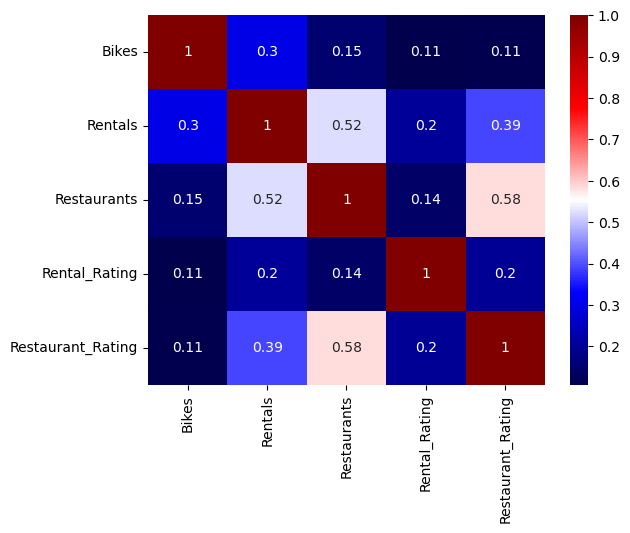

<Figure size 640x480 with 0 Axes>

In [6]:
corr_matrix = df[['Bikes', 
                  'Rentals', 
                  'Restaurants', 
                  'Rental_Rating', 
                  'Restaurant_Rating']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title = ('Cross correlation across the columns')
plt.show()
plt.savefig('../images/pre-cleaning-corr.png', bbox_inches='tight')

In [ ]:
plt.scatter(df['Bikes'], df['Rentals'], color='orange')
plt.title = 'Scatter Plot between Bikes and Rentals'
plt.xlabel('Bikes')
plt.ylabel('Rentals')

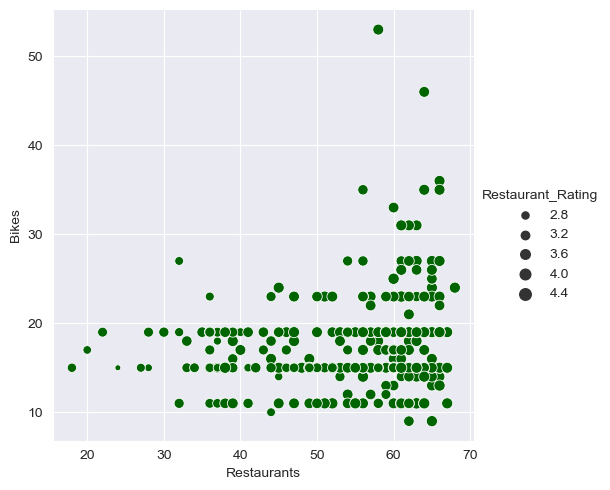

In [7]:
sns.set_style('darkgrid')
sns.relplot(
    data=df,
    x='Restaurants',
    y='Bikes',
#     hue='smoker',
#     style='smoker',
    size='Restaurant_Rating',
    color='darkgreen'
)

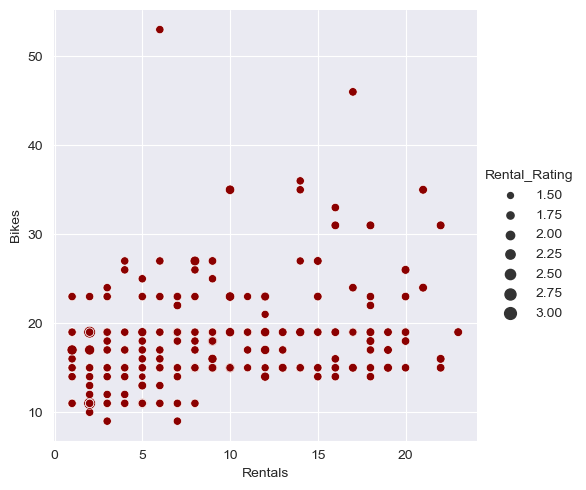

In [8]:
sns.relplot(
    data=df,
    x='Rentals',
    y='Bikes',
#     hue='smoker',
#     style='smoker',
    size='Rental_Rating',
    color='darkred'
)

<Figure size 1000x1000 with 0 Axes>

<Axes: >

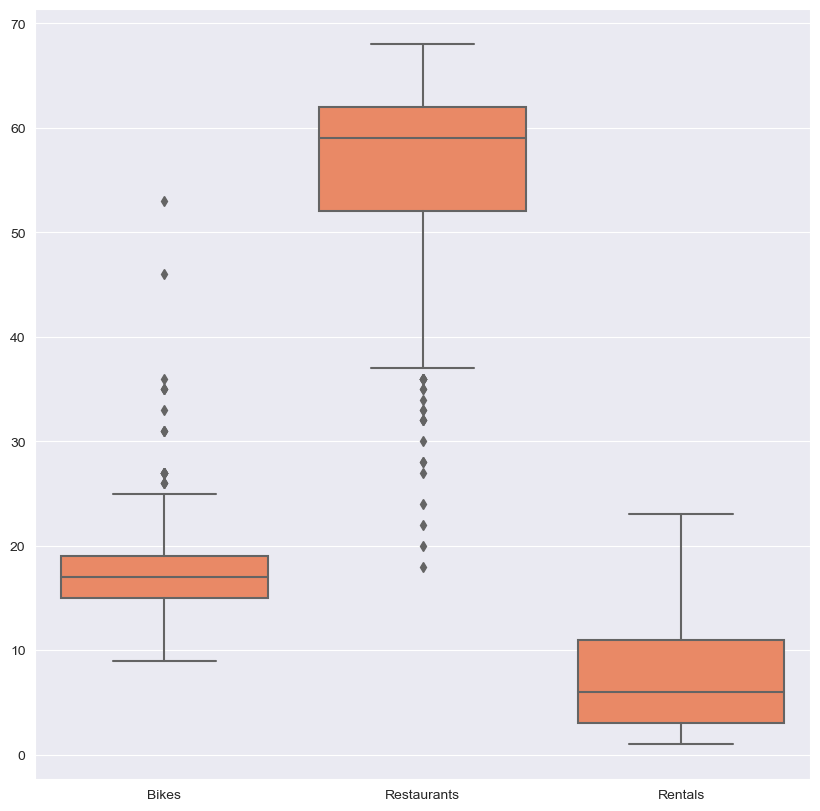

In [9]:
plt.figure(figsize=(10,10))

sns.boxplot(data= df[['Bikes', 'Restaurants','Rentals']], 
            color='coral', orient='v')
plt.savefig('../images/pre-cleaning-boxplot-1.png', bbox_inches='tight')

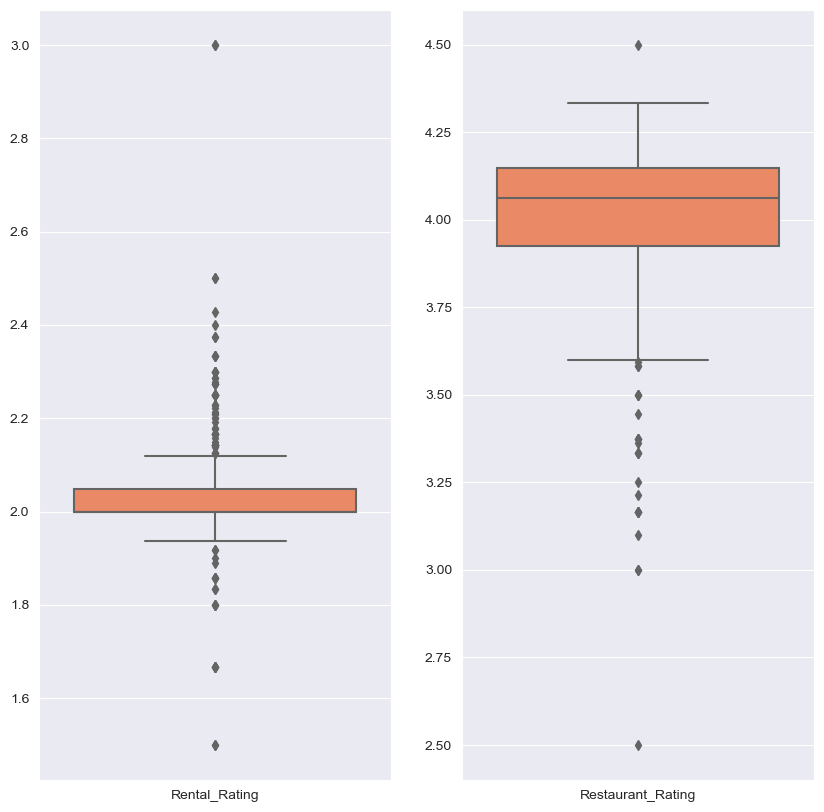

In [10]:
fig, (ax1, ax2) = plt.subplots(figsize=(10,10), nrows=1, ncols=2)
fig = sns.boxplot(df[['Rental_Rating']], color='coral', orient='v', ax=ax1)

fig = sns.boxplot(df[['Restaurant_Rating']], color='coral', orient='v', ax=ax2)


plt.savefig('../images/pre-cleaning-boxplot-2.png', bbox_inches='tight')

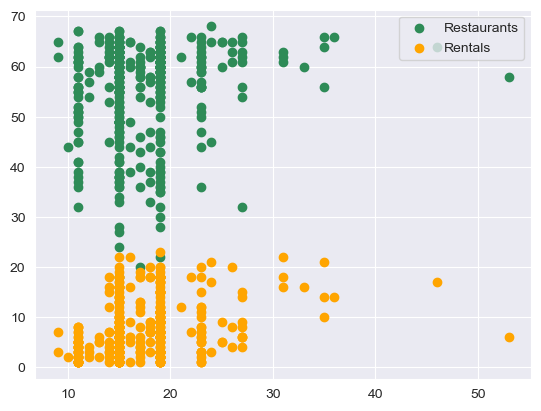

In [11]:
plt.scatter(df['Bikes'], 
            df['Restaurants'],
            marker='o',
            color='seagreen',
            label='Restaurants')

plt.scatter(df['Bikes'], 
            df['Rentals'],
            marker='o',
            color='orange',
            label='Rentals')

plt.legend(loc = 'upper right')
plt.title = ('Distribution of Places of Interests vs Bikes')

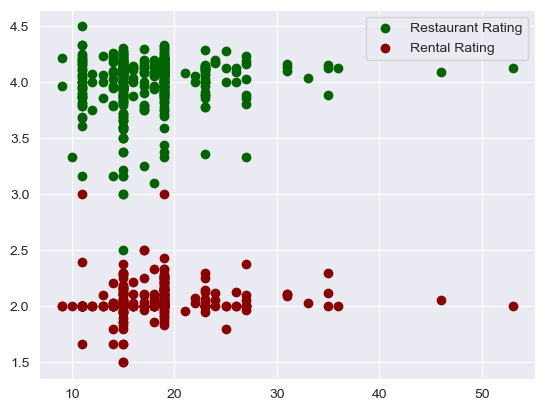

In [12]:
plt.scatter(df['Bikes'], 
            df['Restaurant_Rating'],
            marker='o',
            color='darkgreen',
            label='Restaurant Rating')

plt.scatter(df['Bikes'], 
            df['Rental_Rating'],
            marker='o',
            color='darkred',
            label='Rental Rating')

plt.legend(loc = 'upper right')
plt.title = ('Distribution of Places of Interests vs Bikes')

### Observations:

1. There are several outliers in the data which will need to be handled before modelling.
2. `Bikes` has no clear correlation with the other columns.
3. The strongest correlation is with `Rentals`. 
4. Strong correlation between Average Restaurant Rating and the Number of Restaurants.
5. The next strongest pair correlation is between the Number of Rentals and the Number of Restaurants.
6. Generally stronger correlations between the independent variables. 

#### Preparing the data for modelling: removing outliers.

In [45]:
filter = df['Bikes'] >= 40
filtered_rows = df[filter].index
df.loc[filtered_rows, 'Bikes'] = 40

filter = df['Restaurant_Rating'] <=3.25
filtered_rows = df[filter].index
df.loc[filtered_rows, 'Restaurant_Rating'] = 3.25

filter = df['Rental_Rating'] <=1.6
filtered_rows = df[filter].index
df.loc[filtered_rows, 'Rental_Rating'] = 1.6

filter = df['Restaurant_Rating'] <=2.6
filtered_rows = df[filter].index
df.loc[filtered_rows, 'Restaurant_Rating'] = 2.6

filter = df['Restaurants'] <=30
filtered_rows = df[filter].index
df.loc[filtered_rows, 'Restaurants'] = 30

# no filters for Rentals

In [46]:
df.info() # checking to make sure everything is in order!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bikes              411 non-null    int64  
 1   Restaurants        411 non-null    int64  
 2   Rentals            411 non-null    int64  
 3   Restaurant_Rating  411 non-null    float64
 4   Rental_Rating      411 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.2 KB


### Correlation Matrix

<Axes: >

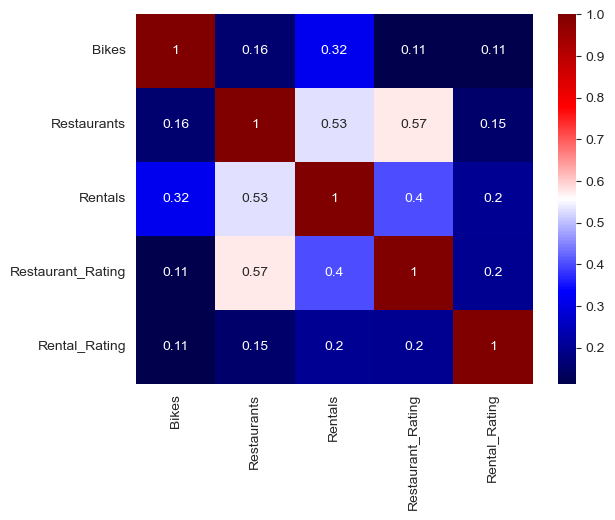

<Figure size 640x480 with 0 Axes>

In [47]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='seismic')
plt.title = ('Cross correlation across the columns')
plt.show()
plt.savefig('../images/post-cleaning-corr.png', bbox_inches='tight')

### Final observations before model building: 

Removing the outliers marginally increased the correlation between `Bikes` and the other variables. There are relatively strong correlations between the variables of `Restaurants` and `Restaurant_Rating`, and `Rentals` and `Restaurants`. But they are not sufficient to conclude that they will affect the model drastically. We will investigate during analysis.

# Model Building

Choose a simple multivariate regression model. The y, target value is `Bikes` and the X values are the other 3 columns: `Rentals`, `Rating`, `Restaurants`.

We will use Forward Selection as there are only 3 variables. 

Following the steps explained in the Model Evaluation lecture, we will test out a single-variable model with each of the 3 variables. The model with the highest adjusted R2 value will inidicate the most siginificant variable. 
We will then continue until we reach...

In [48]:
import statsmodels.api as sm
import numpy as np

### Forward Selection Step 1: 4 models for each of the 4 indepedent variables

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bikes              411 non-null    int64  
 1   Restaurants        411 non-null    int64  
 2   Rentals            411 non-null    int64  
 3   Restaurant_Rating  411 non-null    float64
 4   Rental_Rating      411 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 16.2 KB


In [50]:
y = df['Bikes']
X = [sm.add_constant(df[column]) for column in df.columns[1:]] # adding a constant value to all the X columns

In [51]:
Models = [sm.OLS(y,x) for x in X] #list of models
results = [model.fit() for model in Models] #list of results

for result in results:
    print(result.summary())
    print('==============================================================================')
    print(' ')

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     10.38
Date:                Mon, 24 Apr 2023   Prob (F-statistic):            0.00137
Time:                        17:00:13   Log-Likelihood:                -1198.4
No. Observations:                 411   AIC:                             2401.
Df Residuals:                     409   BIC:                             2409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.9816      1.372      9.460      

### Interpretation of Results

The `Rental` model has the highest adj.R2 value, which fits with the data we noticed in the correlation matrix and other visualizations. It also has a p-factor of almost 0.00 which at <0.05 shows strong statistic significance. 

The highest adj-R2 value is still very low - less than 1%, indicating that this single-variable model explains less than 1% of the 'Bikes' distribution. 

The `Restaurant_Rating` and `Rental_Rating` models had the worst R2 values, but the relatively largest P-factors. 

### Forward Selection Step 2: 3 models: (Rental+Rental_Rating) and (Rental+Restaurant_Rating) and (Rental + Restaurants)

In [68]:
X = [sm.add_constant(df[['Rentals', 'Rental_Rating']]), 
     sm.add_constant(df[['Rentals', 'Restaurants']]),
     sm.add_constant(df[['Rentals', 'Restaurant_Rating']])
     
 ]

In [69]:
models = [sm.OLS(y,x) for x in X] #list of models
results = [model.fit() for model in models] #list of results

for result in results:
    print(result.summary())
    print('==============================================================================')
    print(' ')
    print('\n\n\n')

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.67e-10
Time:                        17:11:53   Log-Likelihood:                -1181.4
No. Observations:                 411   AIC:                             2369.
Df Residuals:                     408   BIC:                             2381.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5189      3.463      3.326

### Interpretation of Results


The combination of `Rental_Rating` and `Rentals` give a slightly higher adjusted-R value than the other combinations. Again, this matches the information we observed during Visualization.

In this model, the P-value of `Rental_Rating` has increased to 0.113.

With the marginal improvement of the R-squared model, there is probably no need for further analysis but for completeness, we will select a third variable and also model with all parameters.

### Forward Selection Step 3: 2 models: (Rental+Rental_Rating+Restaurants) and (Rental+Rental_Rating+Restaurant_Rating) 

In [72]:
X = [sm.add_constant(df[['Rentals', 'Rental_Rating', 'Restaurant_Rating']]), 
     sm.add_constant(df[['Rentals', 'Rental_Rating', 'Restaurants']])
     
 ]

In [73]:
models = [sm.OLS(y,x) for x in X] #list of models
results = [model.fit() for model in models] #list of results

for result in results:
    print(result.summary())
    print('==============================================================================')
    print(' ')
    print('\n\n\n')

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     15.56
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           1.33e-09
Time:                        17:16:52   Log-Likelihood:                -1181.3
No. Observations:                 411   AIC:                             2371.
Df Residuals:                     407   BIC:                             2387.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.2707      5.05

### Interpretation of Results

As suspected, the improvement in the model is marginal, and at this point 2 variables are optimum for the model. However, for completeness, we will also do the model for all 4 variables.

We have enough information to select the best fit model, but for completeness, we will do the model for all 4 variables.

### Forward Selection Step 3 (optional):  all independent variables 

In [74]:
X = df[['Restaurants', 'Rental_Rating', 'Rentals', 'Restaurant_Rating']]
X = sm.add_constant(X)
model = sm.OLS(y,X)

results_3var = model.fit()
print(results_3var.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     11.65
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           5.80e-09
Time:                        17:19:00   Log-Likelihood:                -1181.3
No. Observations:                 411   AIC:                             2373.
Df Residuals:                     406   BIC:                             2393.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                13.2110      5.09

**Interpretation of Results**: The R^2 value did not improve. 

In [75]:
# Repeating the optimum (Rating and Rentals) model below for comparing.

X = df[['Rental_Rating', 'Rentals']]
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y,X)

results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Bikes   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     23.28
Date:                Mon, 24 Apr 2023   Prob (F-statistic):           2.67e-10
Time:                        17:19:47   Log-Likelihood:                -1181.4
No. Observations:                 411   AIC:                             2369.
Df Residuals:                     408   BIC:                             2381.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.5189      3.463      3.326

## Analysis of Optimum Model:
### Visualization

This scatter plot regression diagram compares the predictions from the fitted model to the real 'Bikes' data, based on each independent variable including the constant 1. We can see from the spread of data points that the Bikes data has outliers outside the spread of the fitted data. Further data cleaning might improve the results, but it's possible that these data points are incorrectly identified as outliers and removing them will alter the distribution too severely for proper modelling. More attempts at different models and more data will be required before making that decision.

Text(0.5, 1.0, 'Optimum Regression model (Rental and Rental_Ratings)')

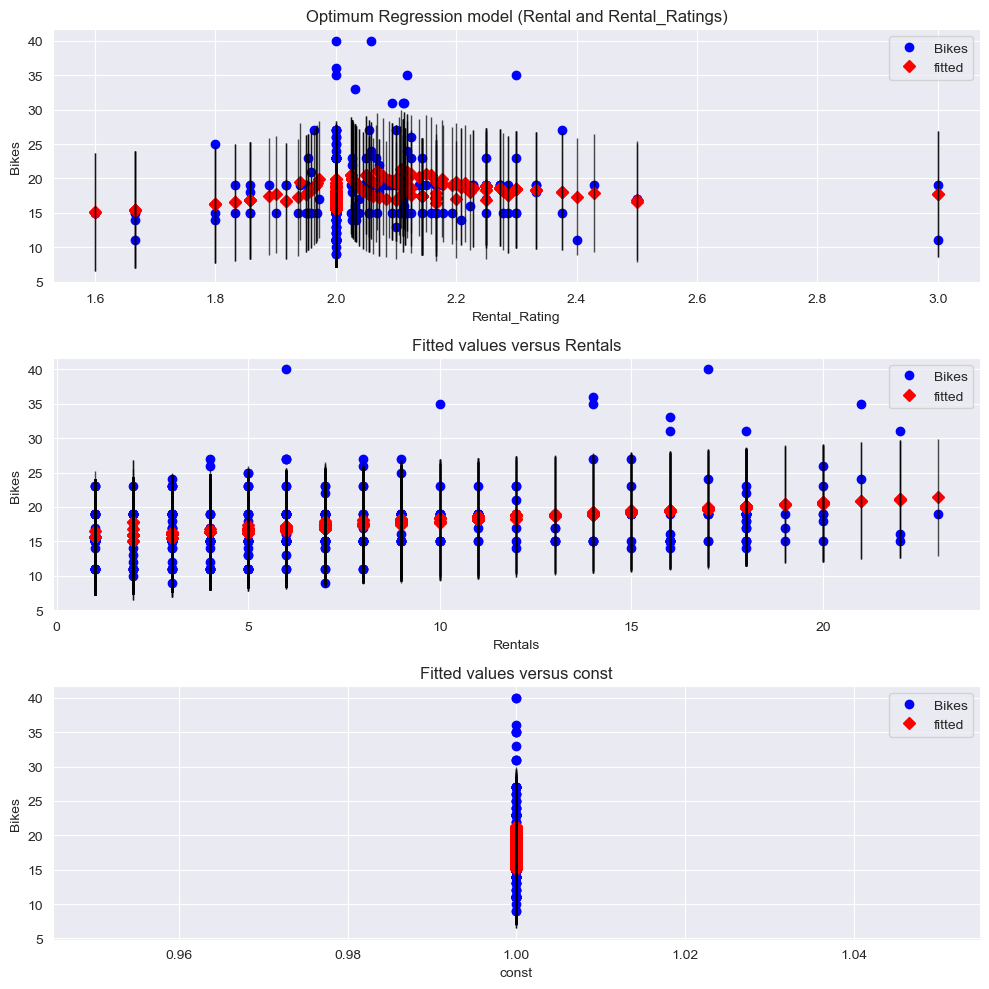

In [81]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(10,10), nrows=3, ncols=1)
fig = sm.graphics.plot_fit(results, 1, ax=ax1)
# ax1.set_ylabel("Bikes")
ax1.set_title("Optimum Regression model (Rental and Rental_Ratings)")

fig = sm.graphics.plot_fit(results, 2, ax=ax2)
# ax2.set_ylabel("Bikes")
# ax2.set_title("All variable Regression model")

fig = sm.graphics.plot_fit(results, 0, ax=ax3)
# ax2.set_ylabel("Bikes")
# ax2.set_title("All variable Regression model")
plt.legend()

plt.tight_layout()
plt.savefig('../images/model_regression_result.png', bbox_inches='tight')

**More Observations**: There appears to be a divide between the 'Bikes' data points at 15-20, and another boundary line above 30. These are potential boundary lines for categorization if we plan to try classification models.

In [84]:
# fig = sm.graphics.plot_partregress_grid(results);
# fig.tight_layout(pad=1.0);

### Recommendations:

The model's performance is not adequate. Recommend testing out a non-linear model or a generalized linear model. Or getting more data for training.

## Turn the Regression Model into a Classification Model

1. **Categorize** the output/dependent variable. The 'Bikes' will be categorized into 3 values. Taking into account its max/min values and with the awareness that its distribution is skewed to the right, the following cateogories are proposed, based on the models above:

    - Class A size: >30
    - Class B size: 20-30
    - Class C size: 14-20
    - Class D size: <14
    
2. The original (pre-cleaning) dataframe will be **updated** accordingly using a simple sorting formula, and the `Bikes` column dtype changed to `category`.
        
3. **Cleaning, visualization and analysis** of the new dataframe. The use of `seaborn`'s rich library of categorical graphics to analyze the new relationships between the variables.

4. Use `statsmodel` `logit` (or any other appropriate model's logistic regression tool) to **fit the model**. Use Backward Selection as the model optimization strategy.

5. **Analyze** the results, visualize them and make improvements and/or recommendations.